In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Bidirectional
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,label_binarize
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.15.0'

In [3]:
!python --version

Python 3.11.5


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### importing the data

In [34]:
df=pd.read_csv("E:\\Naresh IT class\\AIML project\\mental-state.csv")
df.head(15)

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
0     25.781648    33.836367   -92.769629    19.187957           -1.542262   
1     29.357891    26.792566   417.203910    19.472121          -38.797263   
2     28.451926    31.076434    72.231301    14.245938          -13.225057   
3     21.282184    19.985184    16.220094    39.787312            1.847866   
4     20.431516    28.982168    27.540246    19.960398            2.491458   
5     24.816488    33.935570  -139.661789    18.848441            7.250759   
6      3.290689    59.500039   -19.426774   -22.421016           49.851473   
7     26.824973    33.298484    34.236922     5.649555            1.322003   
8     44.601480    38.371996   -62.398910    20.694754          -26.686357   
9     32.201758    30.958168   100.820516    18.152215           21.937420   
10    23.101816    30.477508    26.327129    19.544609            5.413476   
11    21.932617    26.210758    23.971531    17.717324           -2.867010   
12    28.642652    33.388141   132.465363    20.271336           12.282841   
13    26.878332    29.747035   -54.609309    19.948898           12.350982   
14    20.587906    25.955211    40.008543   -13.595590           -4.499990   

    lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  \
0             0.197462         -119.561133            2.032654   
1           -16.897194          -29.368531           -9.055370   
2            -0.614138          -28.331698           -8.858742   
3             0.670216           -1.820355           20.220724   
4            -6.020503           -1.071166            2.655259   
5            -0.724992          -49.476718           -6.629389   
6            -4.575969         -204.340127           62.050689   
7            -1.967359            4.834666            1.535953   
8           -20.452949           24.818914          -32.064117   
9             1.223513           52.014698            2.404429   
10           -2.634352           -5.786214            6.890611   
11            0.195260           17.018003            0.688683   
12            4.533475          149.301799            0.360675   
13           -1.976629          233.827732           -7.577908   
14           -7.513197           12.640854           -3.594026   

    lag1_mean_q1_0  lag1_mean_q1_1  lag1_mean_q1_2  lag1_mean_q1_3  \
0        21.596272       33.965587      -44.185210       20.566772   
1        44.647424       40.893307      383.877655       26.973276   
2        31.450289       30.692883      112.487661       23.340511   
3        21.404679       20.777411       18.611532       29.742982   
4        16.295039       32.658163       26.448437       16.809317   
5        23.006642       36.701695     -146.012507       19.307340   
6        -4.015810       34.750684      165.102354      -32.521349   
7        25.196159       32.972679       28.352427        5.168234   
8        50.084090       43.571026      -79.886988       28.235439   
9        31.222693       30.983085       80.075546       17.366235   
10       16.189292       32.362863       45.483564       15.194014   
11       13.701422       20.267702       22.310798        5.883853   
12       20.015918       29.800635      106.335924       19.168101   
13       40.204557       31.412684     -208.805423       21.154054   
14       20.700649       27.767548       16.969351       -9.724846   

    lag1_mean_q2_0  lag1_mean_q2_1  lag1_mean_q2_2  lag1_mean_q2_3  \
0        31.378853       33.515684      -22.087550       15.839519   
1        52.757486       29.737761      478.635262       21.104585   
2        38.583510       32.055949       60.993231       14.132874   
3        19.339359       18.552407       15.687991       29.612657   
4        22.000462       31.344195       29.660396       20.408235   
5        19.423353       31.957691      -84.652487       24.943779   
6       -38.790622       88.113854        2.551568      -73.820713   
7        27.10631

### Understanding the data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Columns: 989 entries, lag1_mean_0 to Label
dtypes: float64(989)
memory usage: 18.7 MB


In [36]:
df.columns

Index(['lag1_mean_0', 'lag1_mean_1', 'lag1_mean_2', 'lag1_mean_3',
       'lag1_mean_d_h2h1_0', 'lag1_mean_d_h2h1_1', 'lag1_mean_d_h2h1_2',
       'lag1_mean_d_h2h1_3', 'lag1_mean_q1_0', 'lag1_mean_q1_1',
       ...
       'freq_669_3', 'freq_679_3', 'freq_689_3', 'freq_699_3', 'freq_709_3',
       'freq_720_3', 'freq_730_3', 'freq_740_3', 'freq_750_3', 'Label'],
      dtype='object', length=989)

In [37]:
df.isnull().sum()

lag1_mean_0           0
lag1_mean_1           0
lag1_mean_2           0
lag1_mean_3           0
lag1_mean_d_h2h1_0    0
lag1_mean_d_h2h1_1    0
lag1_mean_d_h2h1_2    0
lag1_mean_d_h2h1_3    0
lag1_mean_q1_0        0
lag1_mean_q1_1        0
lag1_mean_q1_2        0
lag1_mean_q1_3        0
lag1_mean_q2_0        0
lag1_mean_q2_1        0
lag1_mean_q2_2        0
lag1_mean_q2_3        0
lag1_mean_d_q1q2_0    0
lag1_mean_d_q1q2_1    0
lag1_mean_d_q1q2_2    0
lag1_mean_d_q1q2_3    0
lag1_mean_d_q1q3_0    0
lag1_mean_d_q1q3_1    0
lag1_mean_d_q1q3_2    0
lag1_mean_d_q1q3_3    0
lag1_mean_d_q1q4_0    0
lag1_mean_d_q1q4_1    0
lag1_mean_d_q1q4_2    0
lag1_mean_d_q1q4_3    0
lag1_mean_d_q2q3_0    0
lag1_mean_d_q2q3_1    0
lag1_mean_d_q2q3_2    0
lag1_mean_d_q2q3_3    0
lag1_mean_d_q2q4_0    0
lag1_mean_d_q2q4_1    0
lag1_mean_d_q2q4_2    0
lag1_mean_d_q2q4_3    0
lag1_std_0            0
lag1_std_1            0
lag1_std_2            0
lag1_std_3            0
lag1_std_d_h2h1_0     0
lag1_std_d_h2h1_

In [38]:
continues=df.drop('Label', axis=1)

In [39]:
continues.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_3  lag1_mean_d_h2h1_0  \
count  2479.000000  2479.000000  2479.000000  2479.000000         2479.000000   
mean     23.584351    27.060411    20.452931    11.526044            0.014449   
std      10.543938    24.252348    72.104439    19.196870           13.382998   
min     -35.224945  -369.150109  -579.490660  -251.495367          -75.143730   
25%      18.732076    21.328936    17.124174     6.541236           -4.647636   
50%      23.553828    27.574535    25.217098    15.144375           -0.140909   
75%      27.759551    32.247539    30.746496    20.589852            3.965898   
max      92.313766   408.180215   591.014113    69.694520          104.963158   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_d_h2h1_3  \
count         2479.000000         2479.000000         2479.000000   
mean             0.003397            0.554037            0.103880   
std             39.383221           97.200697           14.461716   
min           -728.743981        -1048.773622          -96.231800   
25%             -3.342428           -6.773096           -4.498267   
50%              0.180963            0.144378           -0.180041   
75%              3.594742            7.305102            4.146319   
max            512.648208          896.171353          172.660240   

       lag1_mean_q1_0  lag1_mean_q1_1  lag1_mean_q1_2  lag1_mean_q1_3  \
count     2479.000000     2479.000000     2479.000000     2479.000000   
mean        23.271148       26.809551       19.550566       11.094231   
std         17.639164       36.255490       99.410219       22.931254   
min       -351.810178     -800.320690     -931.466781     -250.924186   
25%         17.020349       20.684966       13.413359        5.059414   
50%         23.761987       27.442672       24.566321       14.318299   
75%         29.574478       32.720855       31.712921       21.715288   
max        116.412065      539.925670      751.162851      104.055380   

       lag1_mean_q2_0  lag1_mean_q2_1  lag1_mean_q2_2  lag1_mean_q2_3  \
count     2479.000000     2479.000000     2479.000000     2479.000000   
mean        23.875053       27.301317       20.784803       11.843980   
std         16.544067       37.120344       98.084869       23.020806   
min       -118.767524     -596.347247     -948.216199     -326.314051   
25%         16.780871       20.643741       14.216220        4.870531   
50%         23.462482       27.043790       24.688527       14.545841   
75%         29.568640       32.783551       32.912615       21.935743   
max        209.682082      649.394878      826.657045      118.329299   

       lag1_mean_d_q1q2_0  lag1_mean_d_q1q2_1  lag1_mean_d_q1q2_2  \
count         2479.000000         2479.000000         2479.000000   
mean            -0.603905           -0.491766           -1.234237   
std             23.316994           38.593014           93.974004   
min           -561.492260         -610.601999        -1107.293014   
25%             -4.571657           -3.999909           -9.140541   
50%              0.417265            0.030524           -0.611763   
75%              5.809354            3.854454            6.955669   
max            122.804838          922.215727          827.643845   

       lag1_mean_d_q1q2_3  lag1_mean_d_q1q3_0  lag1_mean_d_q1q3_1  \
count         2479.000000         2479.000000         2479.000000   
mean            -0.749749           -0.009102            0.015853   
std             20.656524           22.393472           47.947189   
min           -267.819754         -365.591464         -735.311965   
25%             -4.963258           -5.937000           -4.684902   
50%              0.207647            0.015439           -0.298916   
75%              5.464460            5.959343            4.438087   
max             99.596780          361.071274         1131.697070   

       lag1_mean_d_q1q3_2  lag1_mean_d_q1q3_3  lag1_mean_d_q1q4_0  \
count         2479.000000 

In [40]:
df['Label'].value_counts()

Label
2.0    830
1.0    830
0.0    819
Name: count, dtype: int64

### Encoding

In [41]:
df_new= pd.get_dummies(df, columns = ['Label'])

In [42]:
df_new.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_3_3,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_3_3,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,lag1_topFreq_4_1,lag1_topFreq_5_1,lag1_topFreq_6_1,lag1_topFreq_7_1,lag1_topFreq_8_1,lag1_topFreq_9_1,lag1_topFreq_10_1,lag1_topFreq_1_2,lag1_topFreq_2_2,lag1_topFreq_3_2,lag1_topFreq_4_2,lag1_topFreq_5_2,lag1_topFreq_6_2,lag1_topFreq_7_2,lag1_topFreq_8_2,lag1_topFreq_9_2,lag1_topFreq_10_2,lag1_topFreq_1_3,lag1_topFreq_2_3,lag1_topFreq_3_3,lag1_topFreq_4_3,lag1_topFreq_5_3,lag1_topFreq_6_3,lag1_topFreq_7_3,lag1_topFreq_8_3,lag1_topFreq_9_3,lag1_topFreq_10_3,lag1_freq_010_0,lag1_freq_020_0,lag1_freq_030_0,lag1_freq_041_0,lag1_freq_051_0,lag1_freq_061_0,lag1_freq_071_0,lag1_freq_081_0,lag1_freq_091_0,lag1_freq_101_0,lag1_freq_111_0,lag1_freq_122_0,lag1_freq_132_0,lag1_freq_142_0,lag1_freq_152_0,lag1_freq_162_0,lag1_freq_172_0,lag1_freq_182_0,lag1_freq_193_0,lag1_freq_203_0,lag1_freq_213_0,lag1_freq_223_0,lag1_freq_233_0,lag1_freq_243_0,lag1_freq_253_0,lag1_freq_264_0,lag1_freq_274_0,lag1_freq_284_0,lag1_freq_294_0,lag1_freq_304_0,lag1_freq_314_0,lag1_freq_324_0,lag1_freq_334_0,lag1_freq_345_0,lag1_freq_355_0,lag1_freq_365_0,lag1_freq_375_0,lag1_freq_385_0,lag1_freq_395_0,lag1_freq_405_0,lag1_freq_416_0,lag1_freq_426_0,lag1_freq_436_0,lag1_freq_446_0,lag1_freq_456_0,lag1_freq_466_0,lag1_freq_476_0,lag1_freq_486_0,lag1_freq_517_0,lag1_freq_527_0,lag1_freq_537_0,lag1_freq_547_0,lag1_freq_557_0,lag1_freq_568_0,lag1_freq_578_0,lag1_freq_588_0,lag1_freq_598_0,lag1_freq_608_0,l

In [43]:
X=df_new.loc[:,'lag1_mean_0':'freq_750_3']
X.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_3_3,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_3_3,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,lag1_topFreq_4_1,lag1_topFreq_5_1,lag1_topFreq_6_1,lag1_topFreq_7_1,lag1_topFreq_8_1,lag1_topFreq_9_1,lag1_topFreq_10_1,lag1_topFreq_1_2,lag1_topFreq_2_2,lag1_topFreq_3_2,lag1_topFreq_4_2,lag1_topFreq_5_2,lag1_topFreq_6_2,lag1_topFreq_7_2,lag1_topFreq_8_2,lag1_topFreq_9_2,lag1_topFreq_10_2,lag1_topFreq_1_3,lag1_topFreq_2_3,lag1_topFreq_3_3,lag1_topFreq_4_3,lag1_topFreq_5_3,lag1_topFreq_6_3,lag1_topFreq_7_3,lag1_topFreq_8_3,lag1_topFreq_9_3,lag1_topFreq_10_3,lag1_freq_010_0,lag1_freq_020_0,lag1_freq_030_0,lag1_freq_041_0,lag1_freq_051_0,lag1_freq_061_0,lag1_freq_071_0,lag1_freq_081_0,lag1_freq_091_0,lag1_freq_101_0,lag1_freq_111_0,lag1_freq_122_0,lag1_freq_132_0,lag1_freq_142_0,lag1_freq_152_0,lag1_freq_162_0,lag1_freq_172_0,lag1_freq_182_0,lag1_freq_193_0,lag1_freq_203_0,lag1_freq_213_0,lag1_freq_223_0,lag1_freq_233_0,lag1_freq_243_0,lag1_freq_253_0,lag1_freq_264_0,lag1_freq_274_0,lag1_freq_284_0,lag1_freq_294_0,lag1_freq_304_0,lag1_freq_314_0,lag1_freq_324_0,lag1_freq_334_0,lag1_freq_345_0,lag1_freq_355_0,lag1_freq_365_0,lag1_freq_375_0,lag1_freq_385_0,lag1_freq_395_0,lag1_freq_405_0,lag1_freq_416_0,lag1_freq_426_0,lag1_freq_436_0,lag1_freq_446_0,lag1_freq_456_0,lag1_freq_466_0,lag1_freq_476_0,lag1_freq_486_0,lag1_freq_517_0,lag1_freq_527_0,lag1_freq_537_0,lag1_freq_547_0,lag1_freq_557_0,lag1_freq_568_0,lag1_freq_578_0,lag1_freq_588_0,lag1_freq_598_0,lag1_freq_608_0,l

In [44]:
y=df_new.loc[:,'Label_0.0':'Label_2.0']
y.head()

,Label_0.0,Label_1.0,Label_2.0
0,False,False,True
1,False,False,True
2,False,False,True
3,False,True,False
4,False,False,True


In [45]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

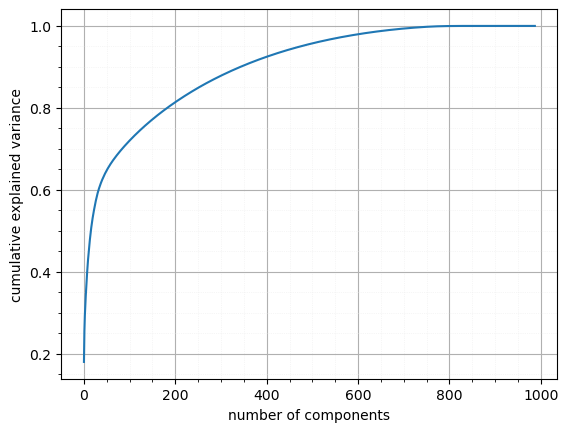

In [46]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [47]:
pca = PCA(n_components = 500)
X_trans = pca.fit_transform(X_new)

In [48]:
X_fin = pd.DataFrame(data=X_trans)
X_fin.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-21.044050,-0.010535,0.718237,-2.682393,4.193227,-1.814457,1.506927,-7.564069,5.086254,-2.217937,0.409228,4.062115,-1.923271,-0.537127,-2.022793,-4.680602,4.243459,-1.099898,-0.662028,-11.139245,-11.342664,1.479456,-1.391147,-5.273550,9.848430,7.158753,1.749148,-3.985621,5.782038,6.703022,4.856765,-0.491480,-1.094180,-6.827876,3.290859,1.641003,1.069913,0.469871,0.667511,-1.842847,-0.483389,-1.638314,-3.673022,-1.158445,-0.234166,-1.841111,0.247442,3.735559,-1.947370,1.196208,-0.638044,1.586618,-1.259997,-1.710378,0.532907,0.614231,0.794598,0.462374,0.546844,-1.956638,0.273619,0.154139,-0.577145,-0.775992,1.485451,-0.632856,0.058617,0.425257,-0.213188,0.000374,0.858339,-0.416474,1.194452,1.961439,-0.429091,-0.001260,-0.413133,-0.262928,-1.273381,-0.680200,0.192650,0.073171,-0.646715,-0.197321,0.491752,1.627422,-0.269625,-0.023684,-0.709981,-0.054061,1.703041,1.411746,0.313212,0.340131,-1.019617,0.287625,-0.293082,-1.025478,0.208546,-0.295014,0.582488,-0.314512,-0.097655,-0.529062,-0.236346,-0.364134,-0.485630,0.589009,0.608197,0.275246,1.563700,0.277827,-1.032106,-0.398547,-0.300306,0.095232,0.595283,-0.060674,0.199699,0.479979,-0.159769,0.672181,0.239594,0.723589,0.530656,-0.226336,0.950161,0.559440,-0.188789,-0.243494,-0.254174,-0.117705,-0.360888,-0.424253,-0.198321,-0.377224,-0.391126,0.987847,0.668321,-0.432436,0.218042,0.897852,0.991685,-0.792318,-0.394635,0.268208,0.364420,0.451331,1.081805,0.251649,0.677416,-0.010497,0.659303,-0.506480,0.439562,0.336237,0.892072,-0.826751,-0.371070,0.028606,-1.261755,-0.969365,0.007382,1.293567,-0.026524,0.091607,0.278961,-0.996799,-0.222526,0.265437,-0.129403,0.685970,-0.912404,-1.127314,-0.229821,-0.172154,0.306040,-0.103655,-0.358331,0.137143,0.237863,0.378543,0.284816,0.373844,-0.176320,0.314927,0.204473,0.367735,-0.021463,0.298380,-1.072304,0.666677,-0.368633,0.190311,-0.367584,0.032051,-0.178222,-0.249253,0.040028,0.628842,-0.117563,0.272405,-0.373282,-0.114072,0.212624,0.437793,0.562986,-0.549283,0.561024,-0.506563,0.761322,0.649490,-0.212792,0.499794,0.659287,-0.100058,-0.218727,-0.474207,0.367600,-0.048325,-0.431395,-1.1

In [49]:
X_fin=X_fin.values
y=y.values

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.25,random_state=123)

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [52]:
X_train.shape

(1487, 500)

In [53]:
X_val.shape

(372, 500)

In [54]:
model = Sequential()
input_shape=(X_train.shape[1], 1)
model.add(Conv1D(64, kernel_size=5,activation='relu', input_shape=input_shape))
model.add(Conv1D(64,kernel_size=5, activation='relu'))
model.add(Conv1D(32,kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Bidirectional(LSTM(64,activation="sigmoid",return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32,activation="sigmoid",return_sequences=False)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 496, 64)           384       
                                                                 
 conv1d_4 (Conv1D)           (None, 492, 64)           20544     
                                                                 
 conv1d_5 (Conv1D)           (None, 488, 32)           10272     
                                                                 
 batch_normalization_1 (Bat  (None, 488, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 244, 32)           0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 244, 128)         

In [55]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

from tensorflow.keras.callbacks import EarlyStopping

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [56]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=3)]

In [57]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=METRICS)

In [58]:
history=model.fit(X_train, y_train,
          batch_size=35,
          epochs=65,
          verbose=1,callbacks=[early_stopping],validation_data=(X_val,y_val))

Epoch 1/65
43/43 [==============================] - 50s 702ms/step - loss: 1.1401 - acc: 0.3773 - auc: 0.5374 - f1_score: 0.3765 - val_loss: 1.0906 - val_acc: 0.3280 - val_auc: 0.5982 - val_f1_score: 0.2088
Epoch 2/65
43/43 [==============================] - 22s 506ms/step - loss: 0.9746 - acc: 0.5145 - auc: 0.7121 - f1_score: 0.5126 - val_loss: 0.9922 - val_acc: 0.4274 - val_auc: 0.7096 - val_f1_score: 0.3262
Epoch 3/65
43/43 [==============================] - 22s 513ms/step - loss: 0.6514 - acc: 0.7478 - auc: 0.8976 - f1_score: 0.7429 - val_loss: 0.9626 - val_acc: 0.6156 - val_auc: 0.7607 - val_f1_score: 0.5845
Epoch 4/65
43/43 [==============================] - 22s 509ms/step - loss: 0.5043 - acc: 0.8056 - auc: 0.9316 - f1_score: 0.8026 - val_loss: 0.5210 - val_acc: 0.8683 - val_auc: 0.9442 - val_f1_score: 0.8684
Epoch 5/65
43/43 [==============================] - 22s 503ms/step - loss: 0.4407 - acc: 0.8534 - auc: 0.9479 - f1_score: 0.8511 - val_loss: 0.5297 - val_acc: 0.8172 - val_

In [59]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 95.965%


In [60]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 94.839%


In [61]:
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 93.817%


In [62]:
train_scores = model.evaluate(X_train, y_train)
val_scores = model.evaluate(X_val, y_val)
test_scores = model.evaluate(X_test,y_test)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

20/20 [==============================] - 3s 150ms/step - loss: 0.1769 - acc: 0.9484 - auc: 0.9900 - f1_score: 0.9497
Training Accuracy: 95.97%
Validation Accuracy: 93.82%
Testing Accuracy: 94.84%


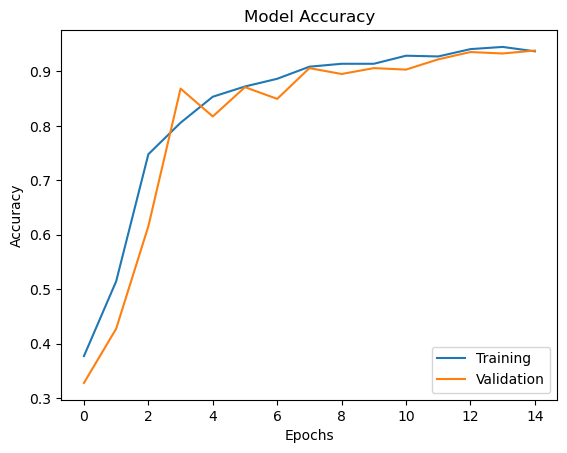

In [81]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model Accuracy.png', format='png', dpi=300)

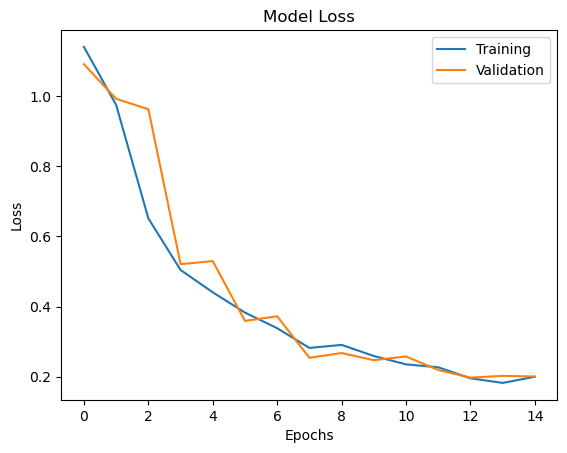

In [82]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
fig.savefig('Model Loss.png', format='png', dpi=300)

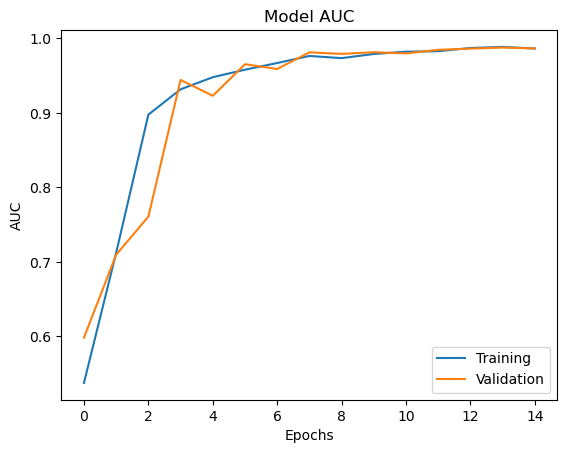

In [83]:
fig, ax = plt.subplots()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model AUC.png', format='png', dpi=300)

In [67]:
y_pred=model.predict(X_test)

20/20 [==============================] - 5s 140ms/step


In [68]:
y_pred_train=model.predict(X_train)

47/47 [==============================] - 7s 146ms/step


In [69]:
y_pred_val=model.predict(X_val)

12/12 [==============================] - 2s 141ms/step


In [70]:
y_new=model.predict(X_fin)

78/78 [==============================] - 11s 142ms/step


In [71]:
y_pred

array([[9.0029466e-01, 9.9313118e-02, 3.9222385e-04],
       [4.2646866e-02, 8.9915824e-01, 5.8194824e-02],
       [2.1672371e-04, 2.4418151e-03, 9.9734145e-01],
       ...,
       [2.0959109e-04, 2.3190021e-03, 9.9747133e-01],
       [2.8222022e-04, 3.2713697e-03, 9.9644643e-01],
       [2.4315447e-04, 3.5387743e-03, 9.9621814e-01]], dtype=float32)

In [72]:
y_test

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [73]:
y_test1=np.argmax(y_test, axis=1)

In [74]:
y_test1

array([0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0,

In [75]:
y_pred1=np.argmax(y_pred,axis=1)

In [76]:
y_pred1

array([0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0,

In [77]:
y_test1[56]

1

In [78]:
y_pred1[56]

1

In [79]:
confusion_matrix(y_test1,y_pred1)

array([[188,  19,   0],
       [  4, 213,   9],
       [  0,   0, 187]], dtype=int64)

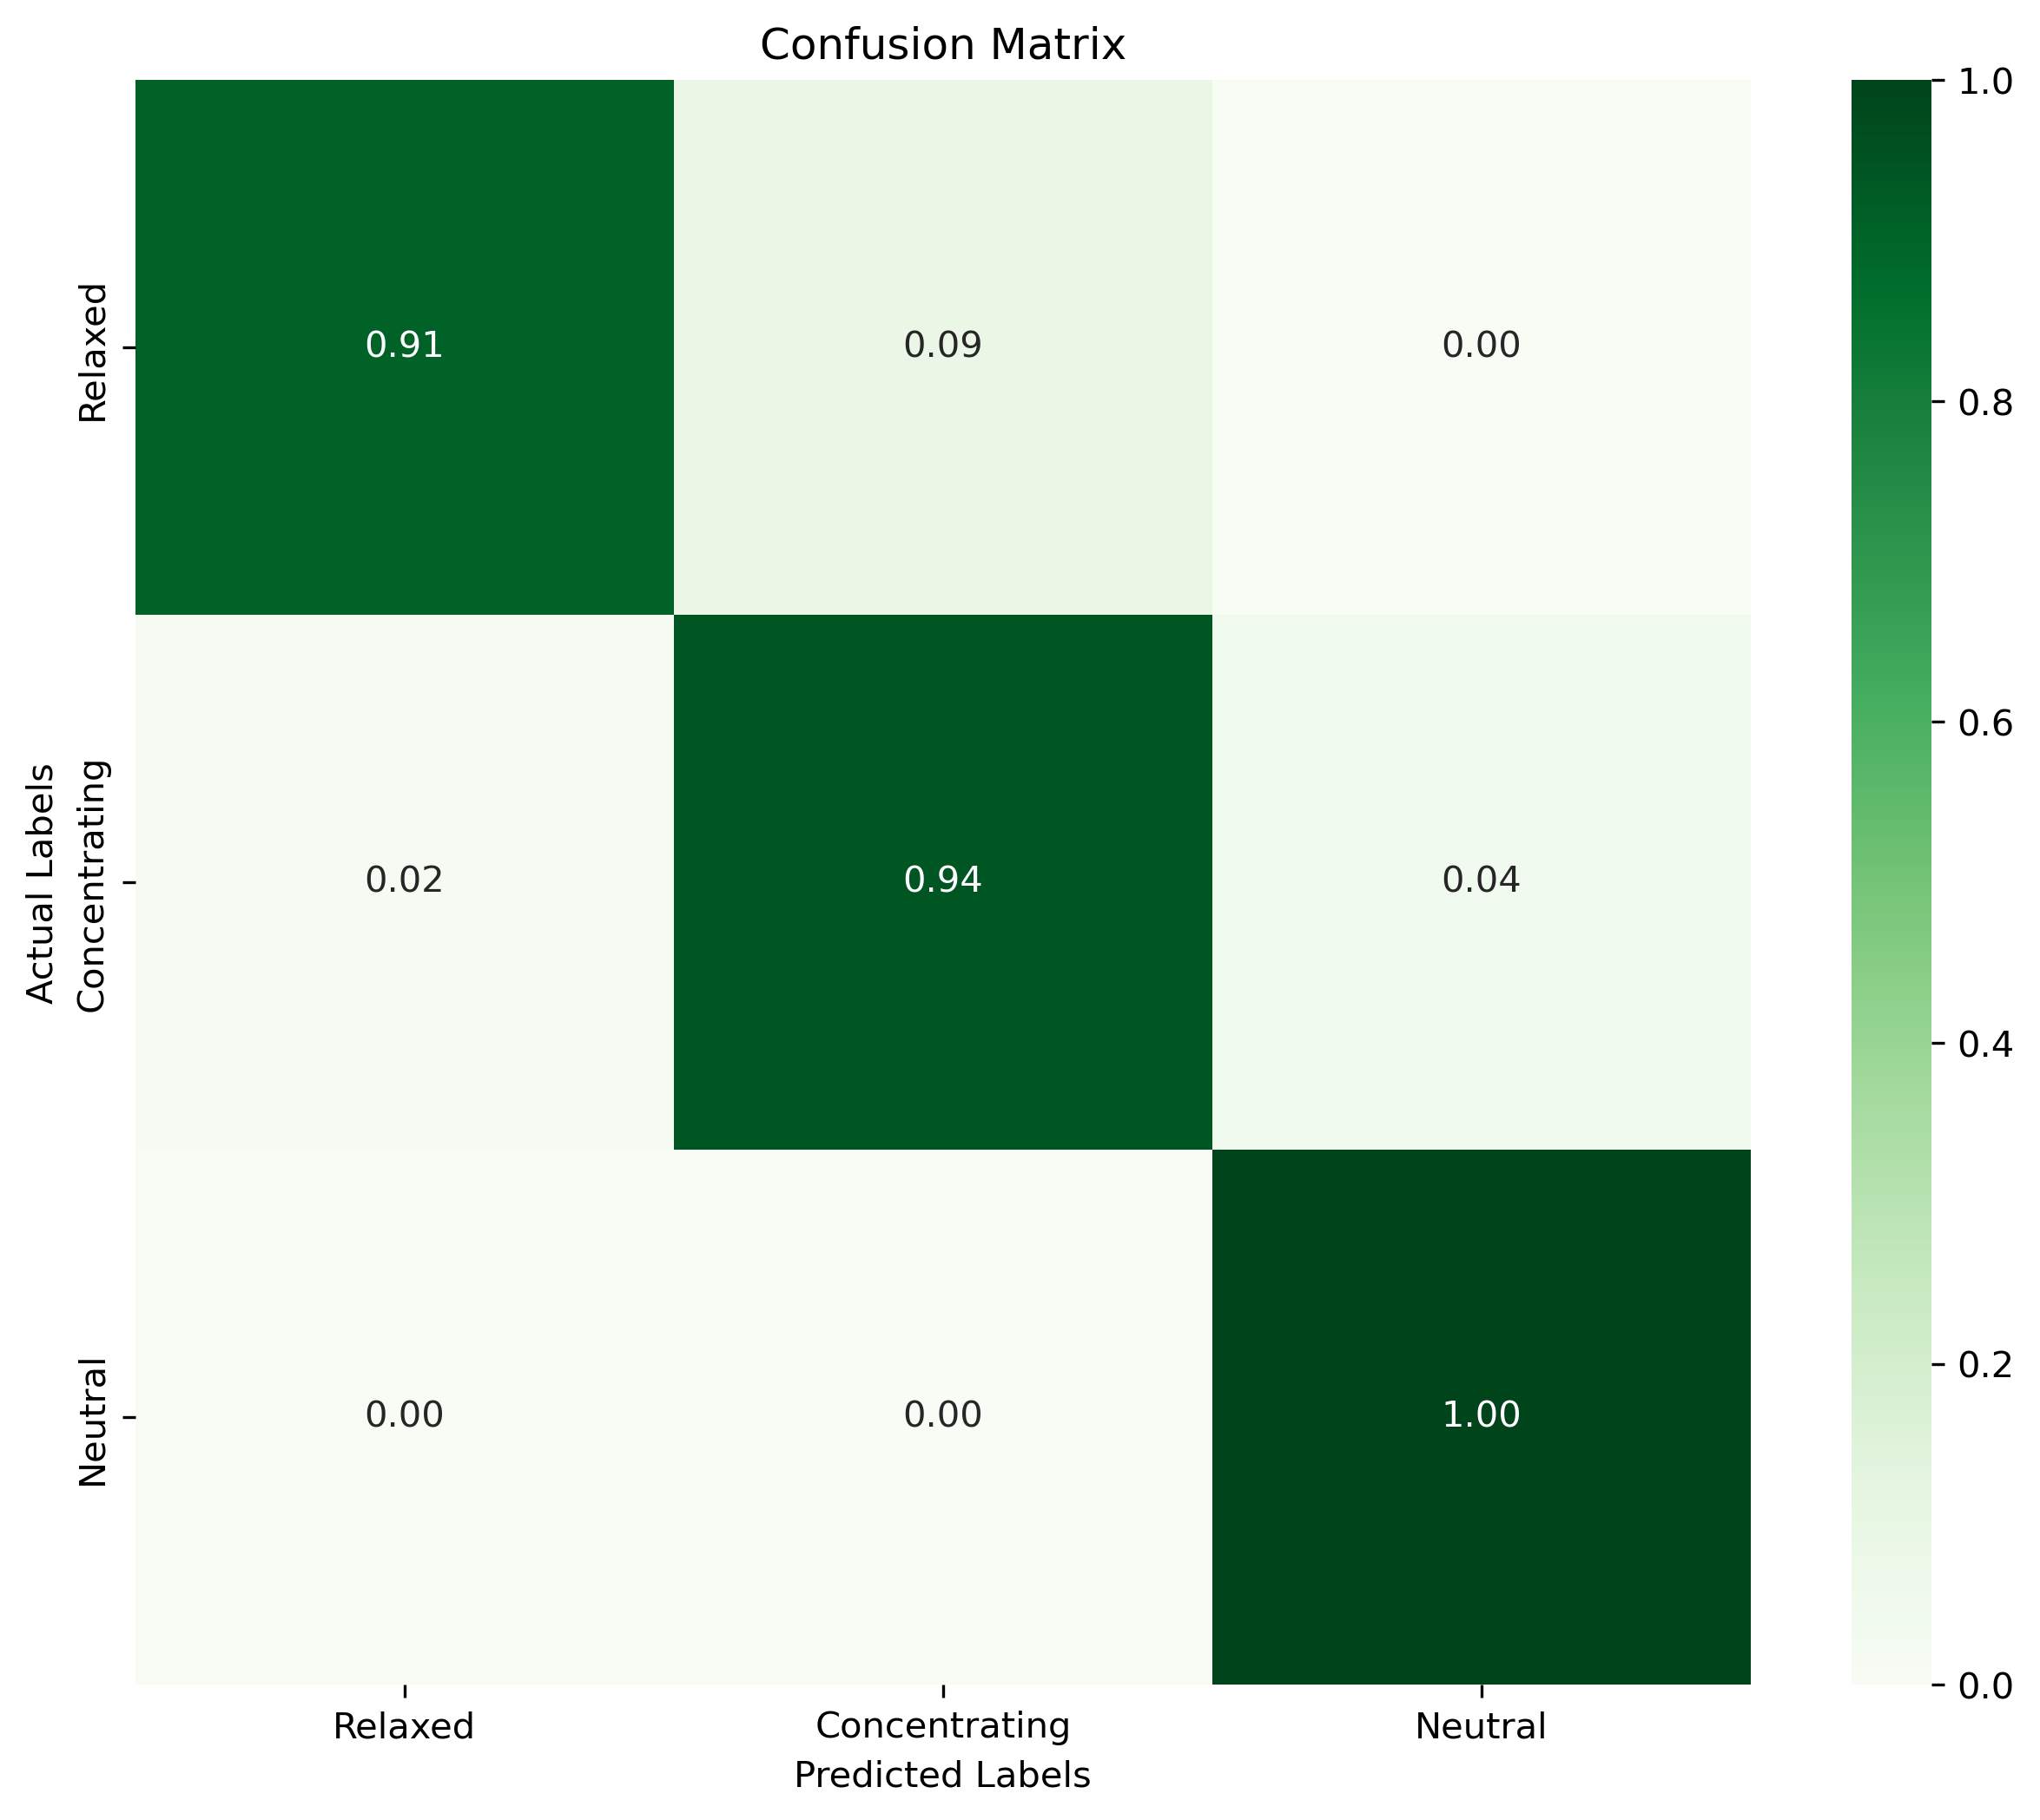

In [85]:
test= np.argmax(y_test, axis=1)
pred= np.argmax(y_pred, axis=1)
conf_matr = confusion_matrix(test, pred)

CLASSES=['Relaxed','Concentrating','Neutral']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [86]:
print("classification_report\n",classification_report(y_test1,y_pred1))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       207
           1       0.92      0.94      0.93       226
           2       0.95      1.00      0.98       187

    accuracy                           0.95       620
   macro avg       0.95      0.95      0.95       620
weighted avg       0.95      0.95      0.95       620



In [87]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred,multi_class='ovo') #one-on-one

In [88]:
auc

0.9910495080636527

In [89]:
new_pred=label_binarize(y_pred1,classes=np.unique(y_pred1))
classes=np.unique(y_pred1)

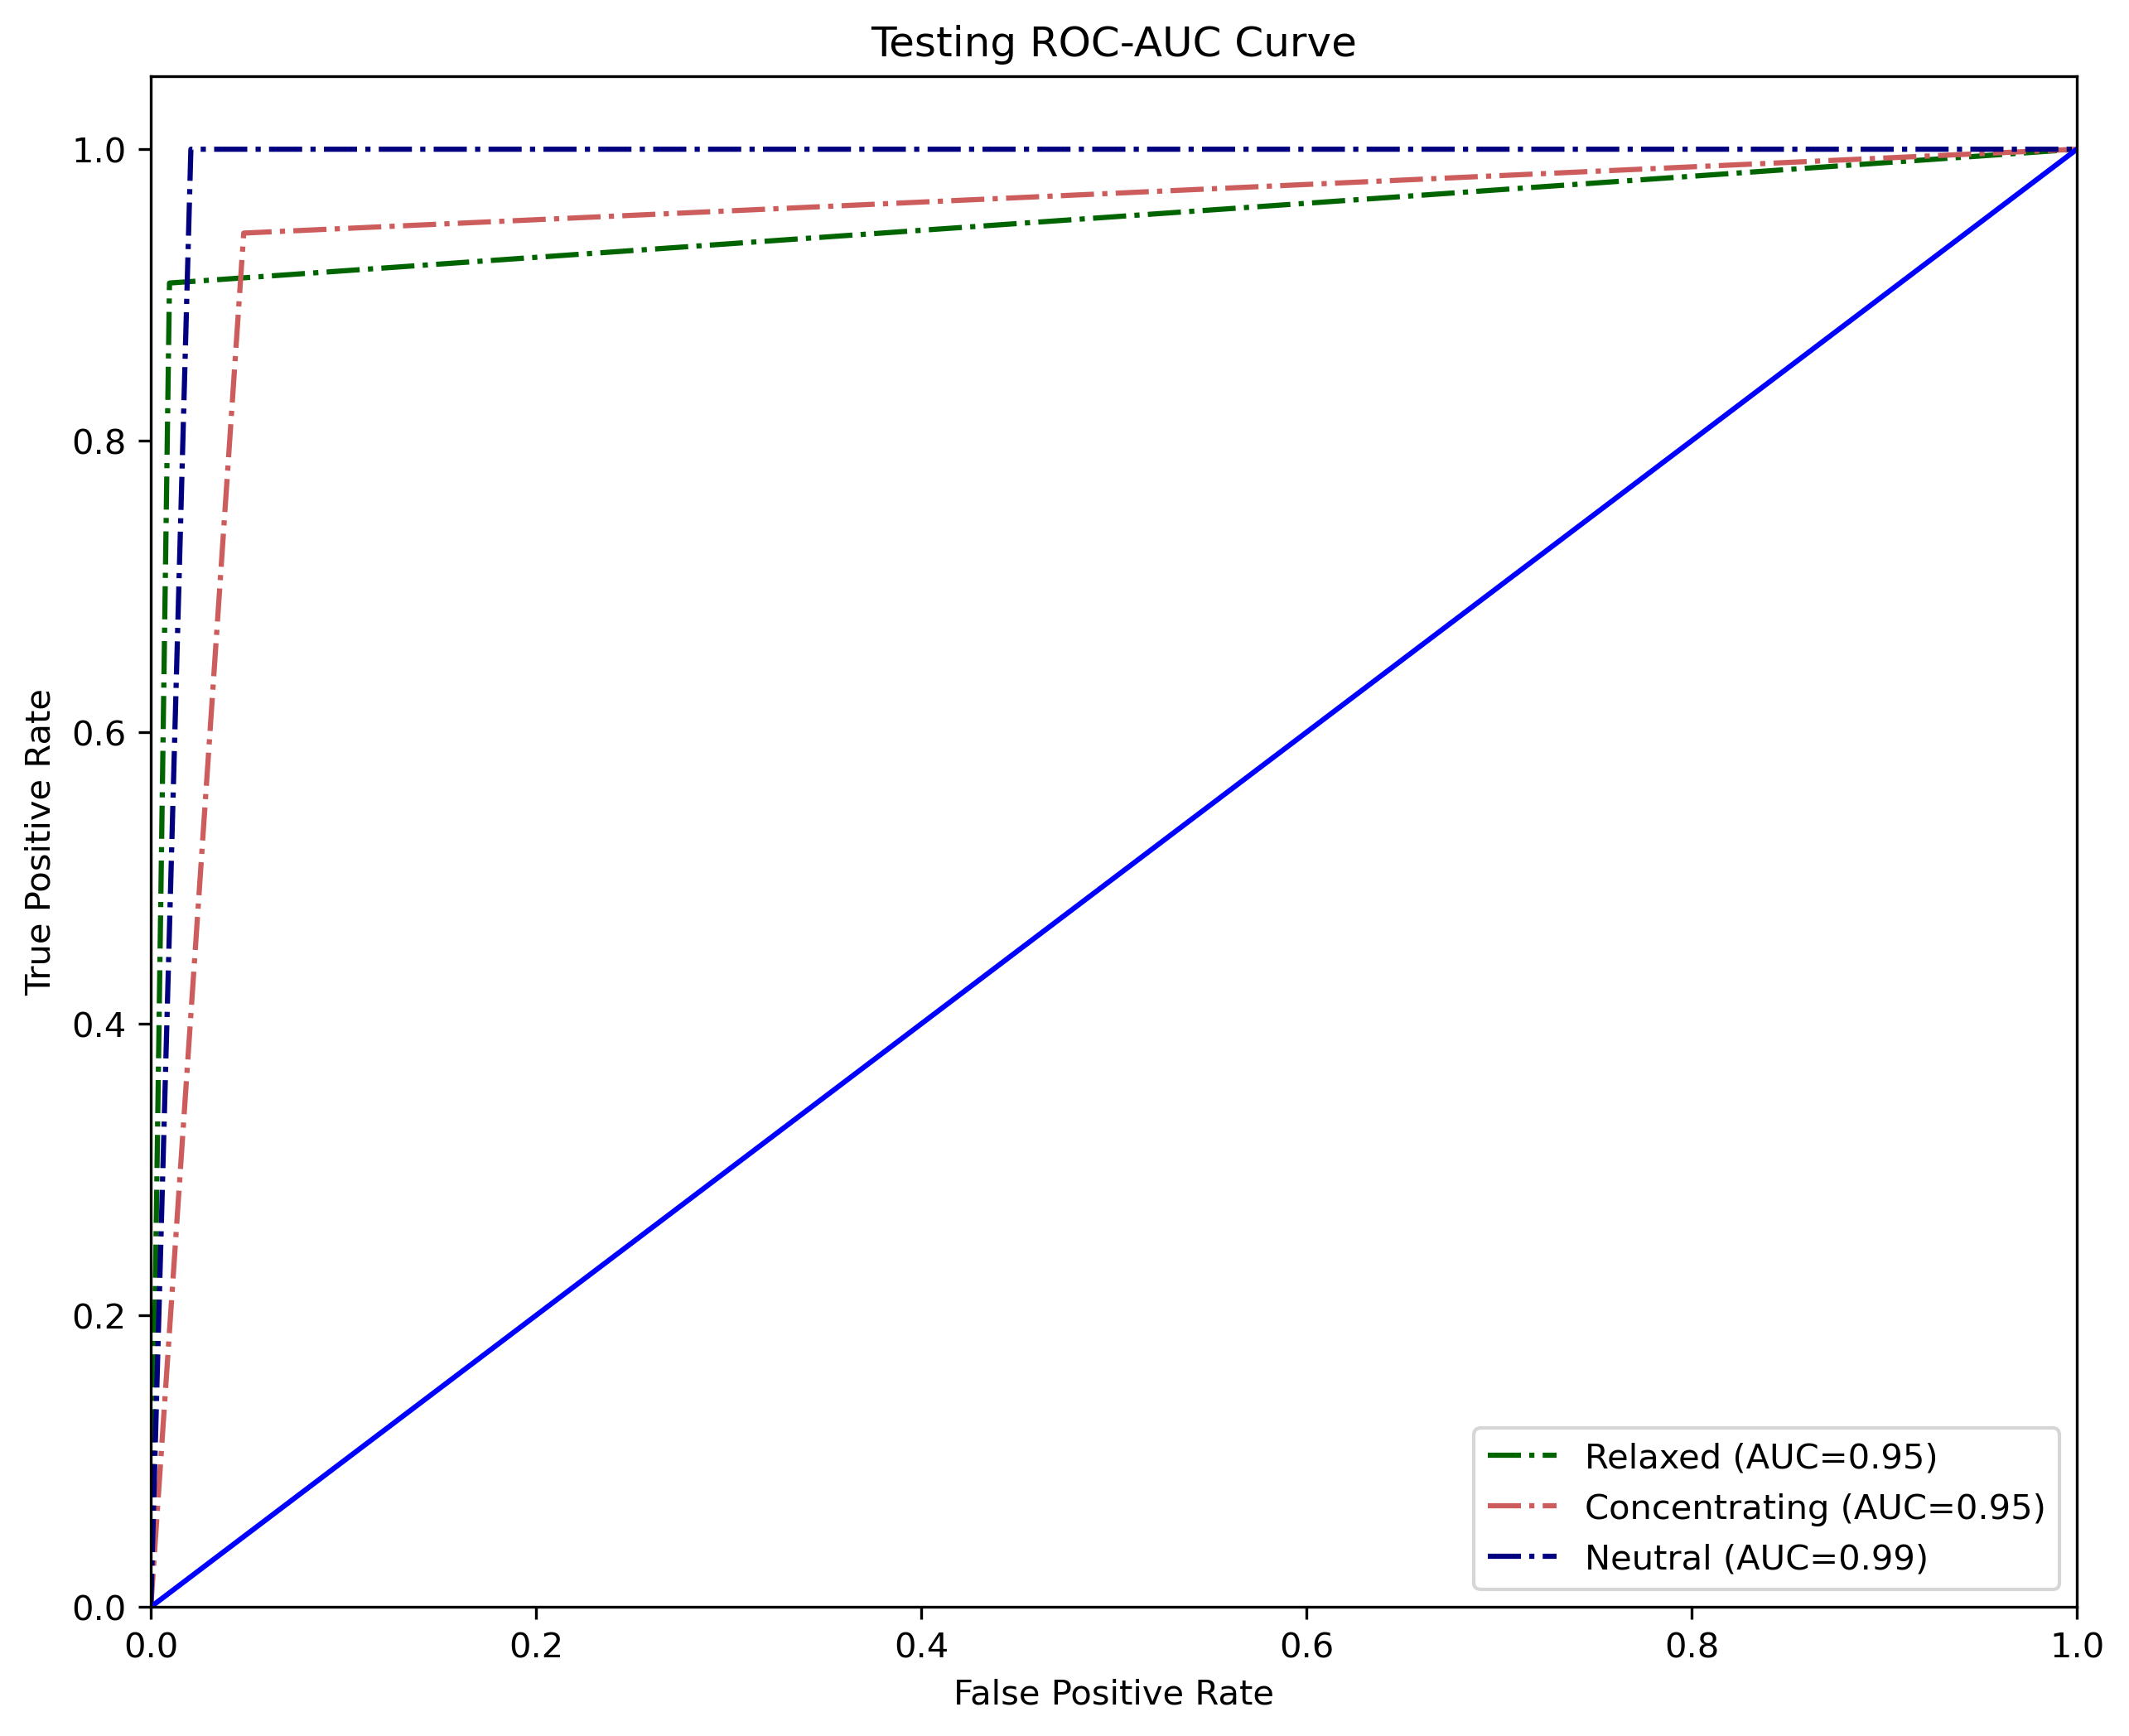

In [91]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Relaxed (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Concentrating (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Neutral (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

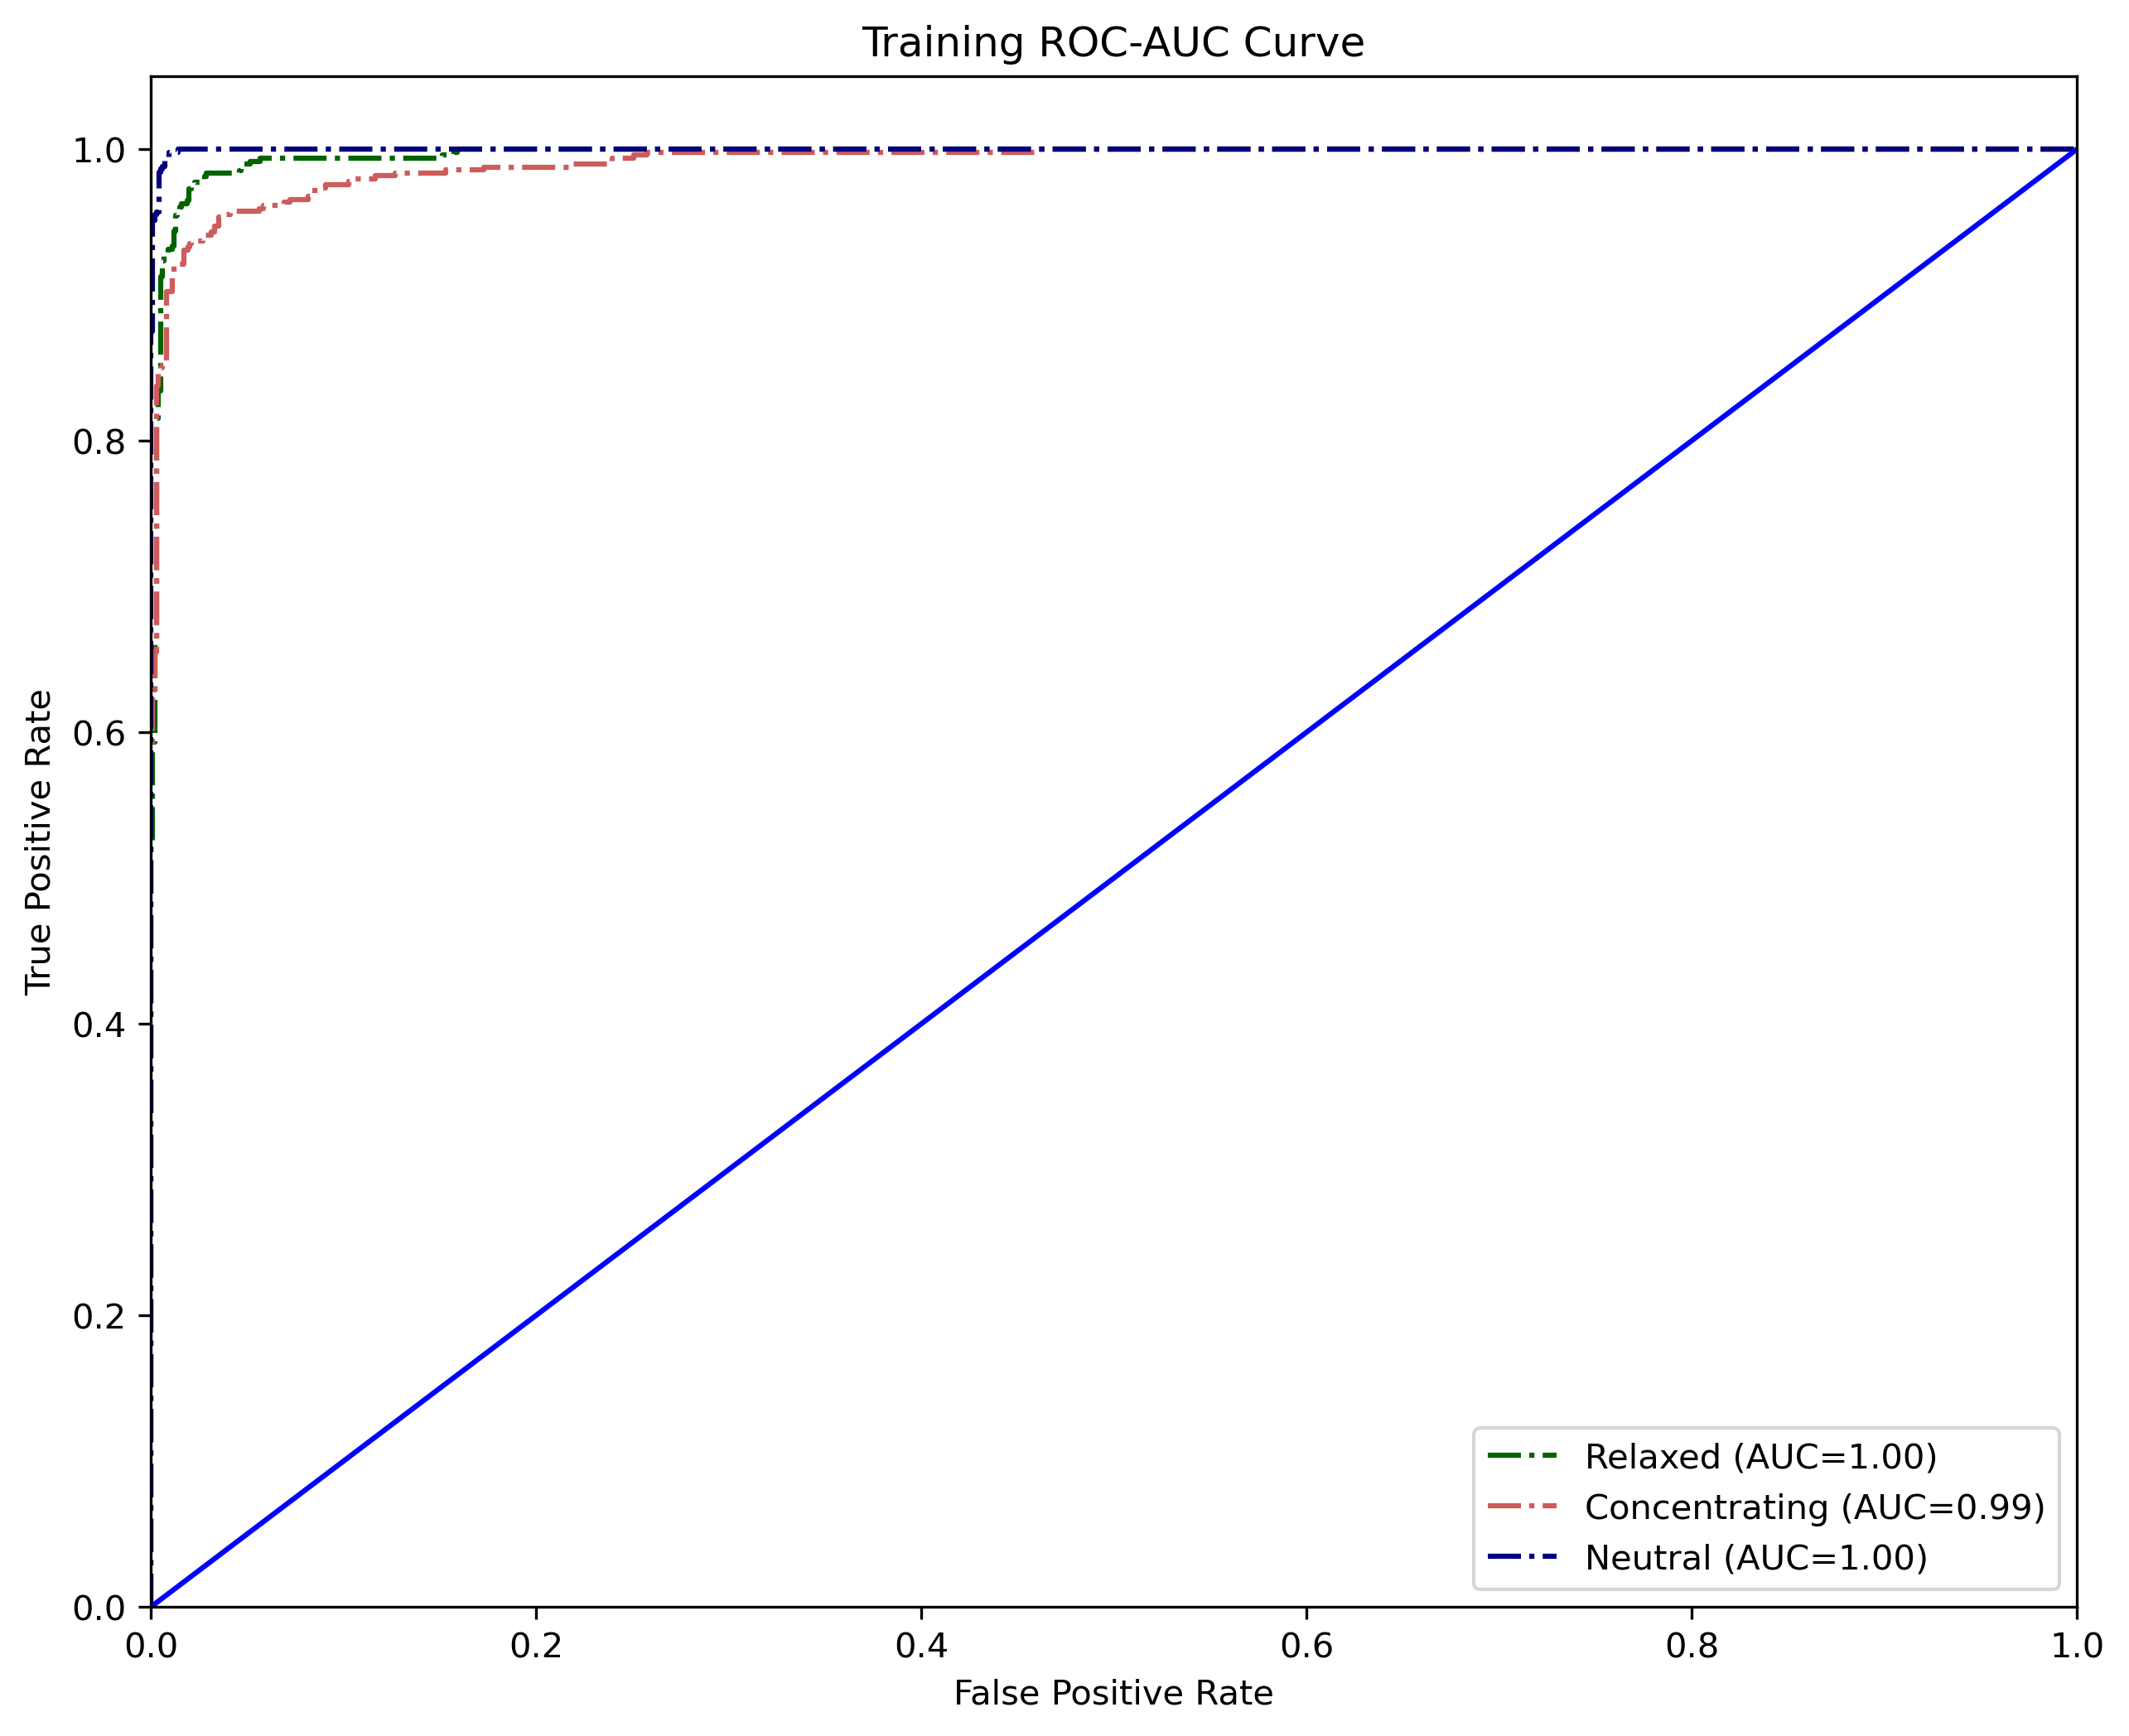

In [92]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_train[:,i],y_pred_train[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Relaxed (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Concentrating (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Neutral (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

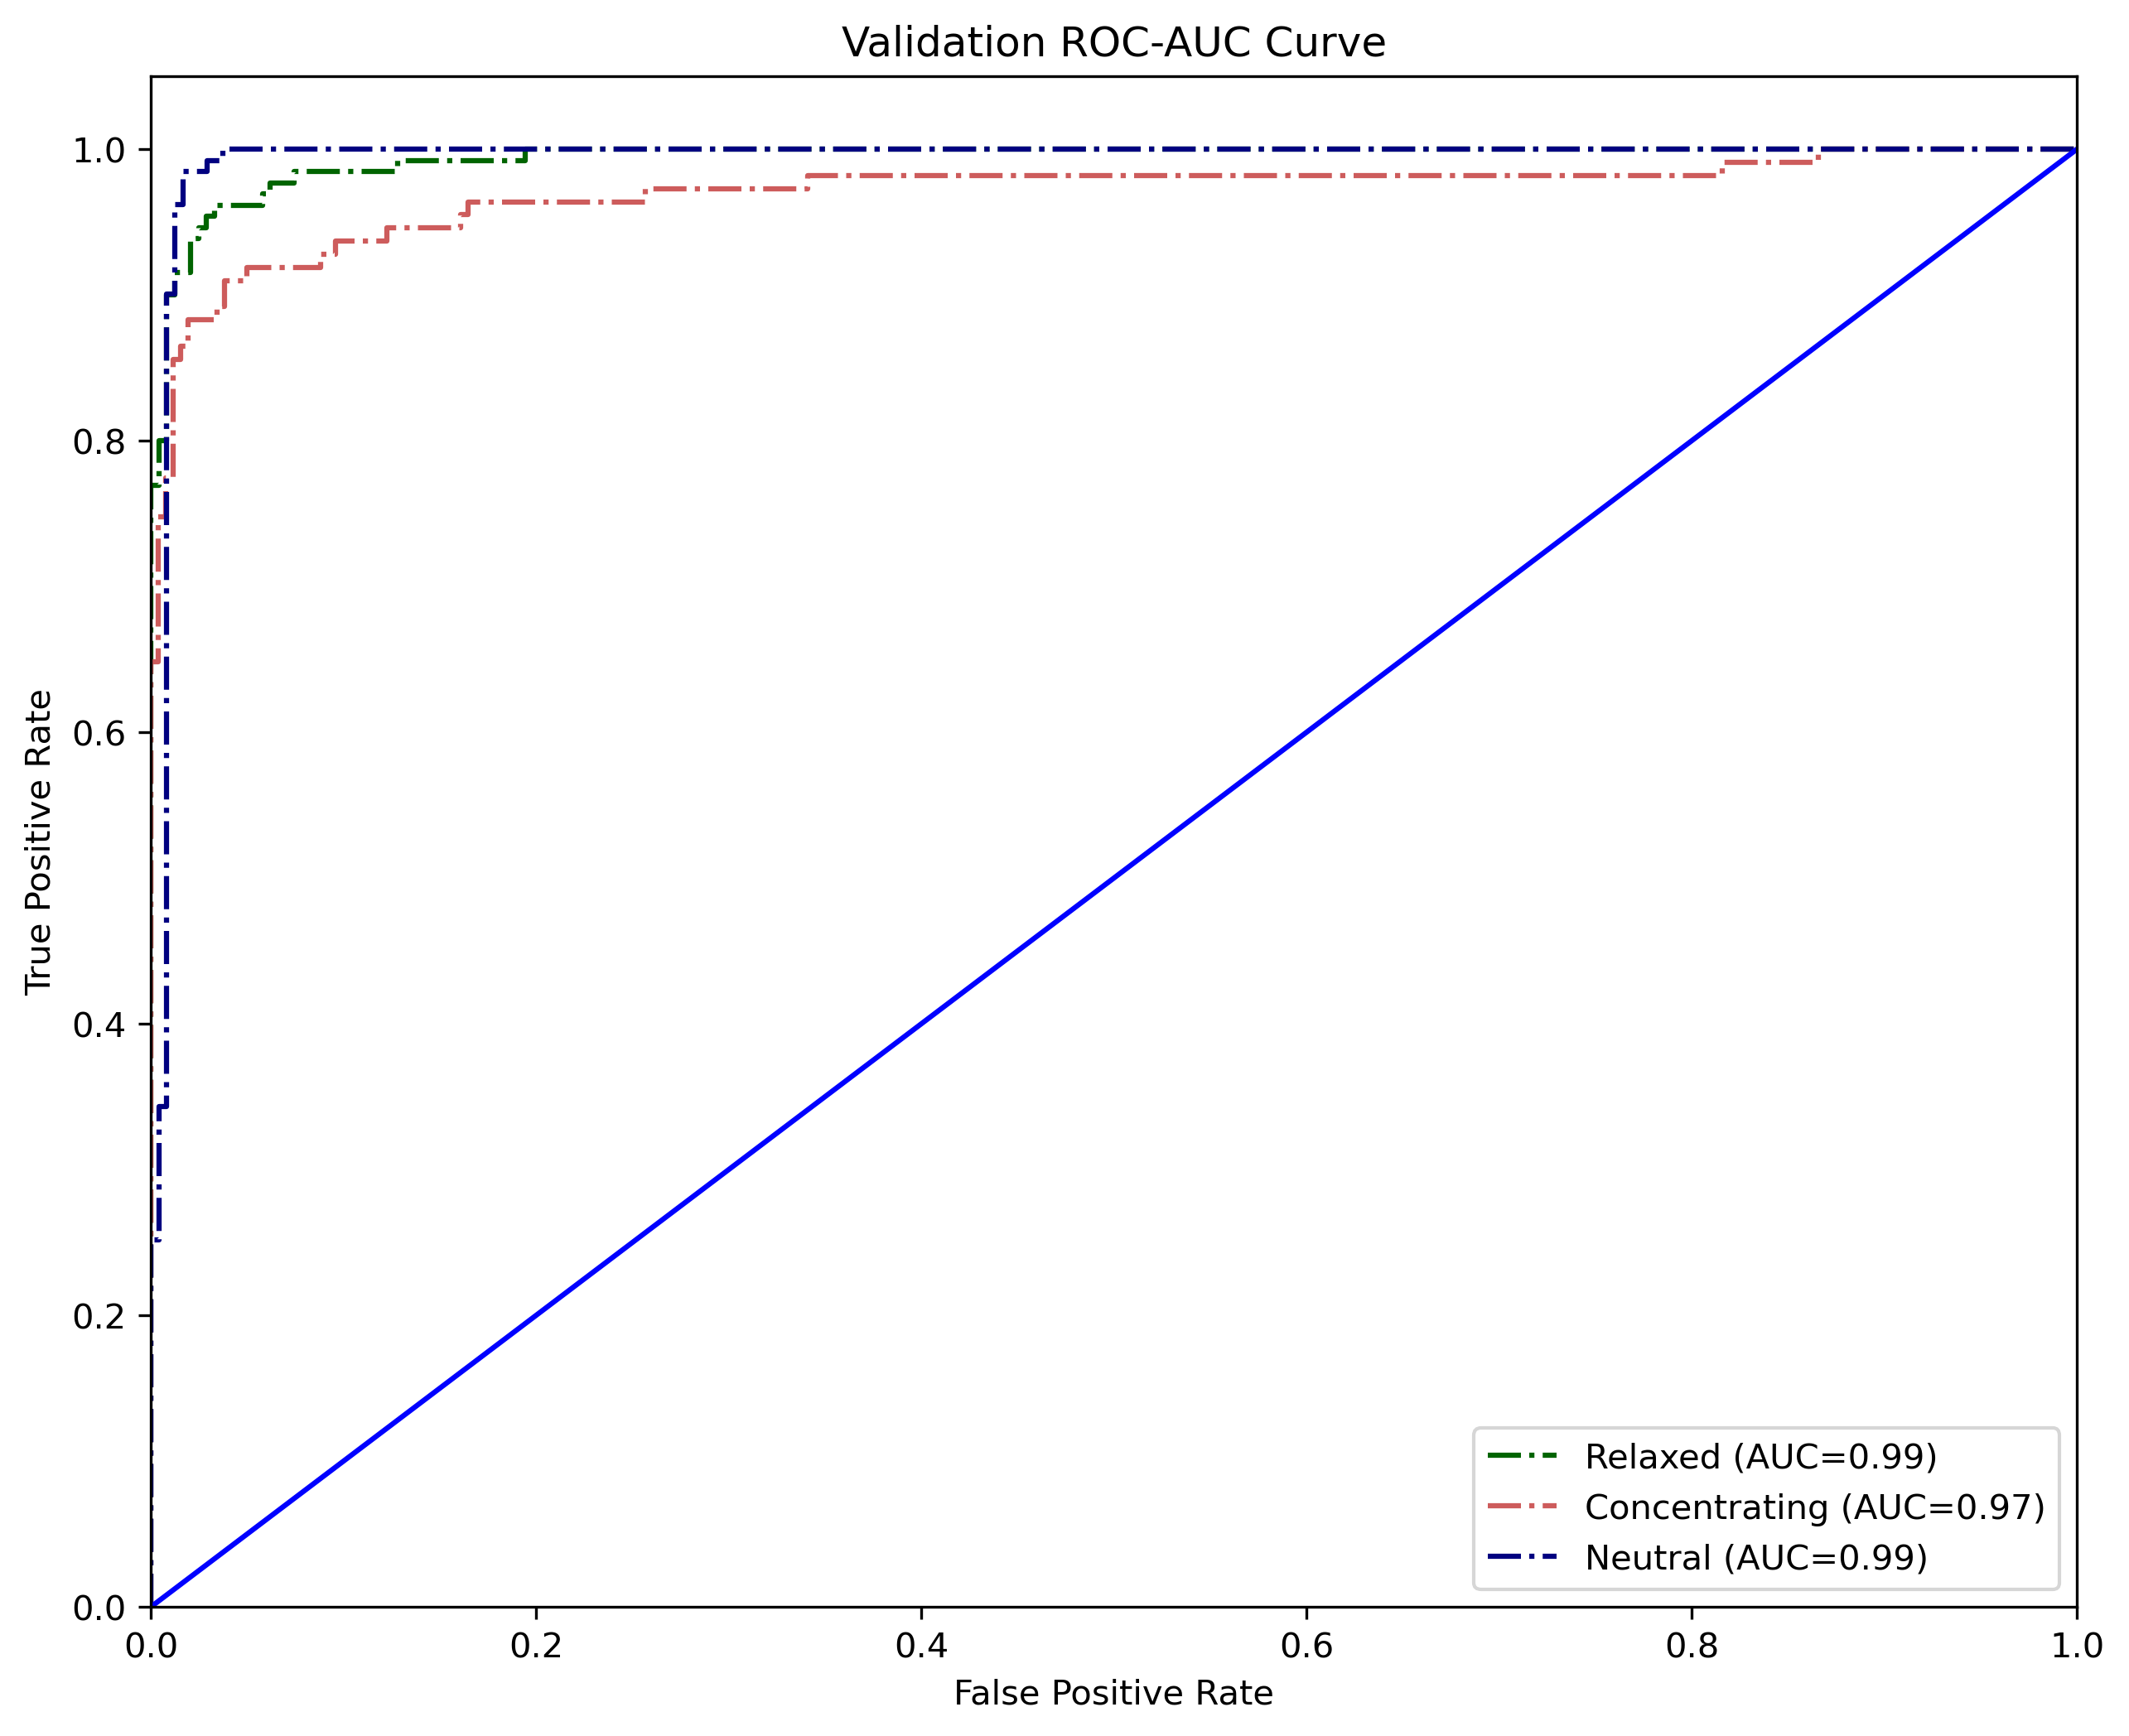

In [93]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_val[:,i],y_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Relaxed (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Concentrating (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Neutral (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

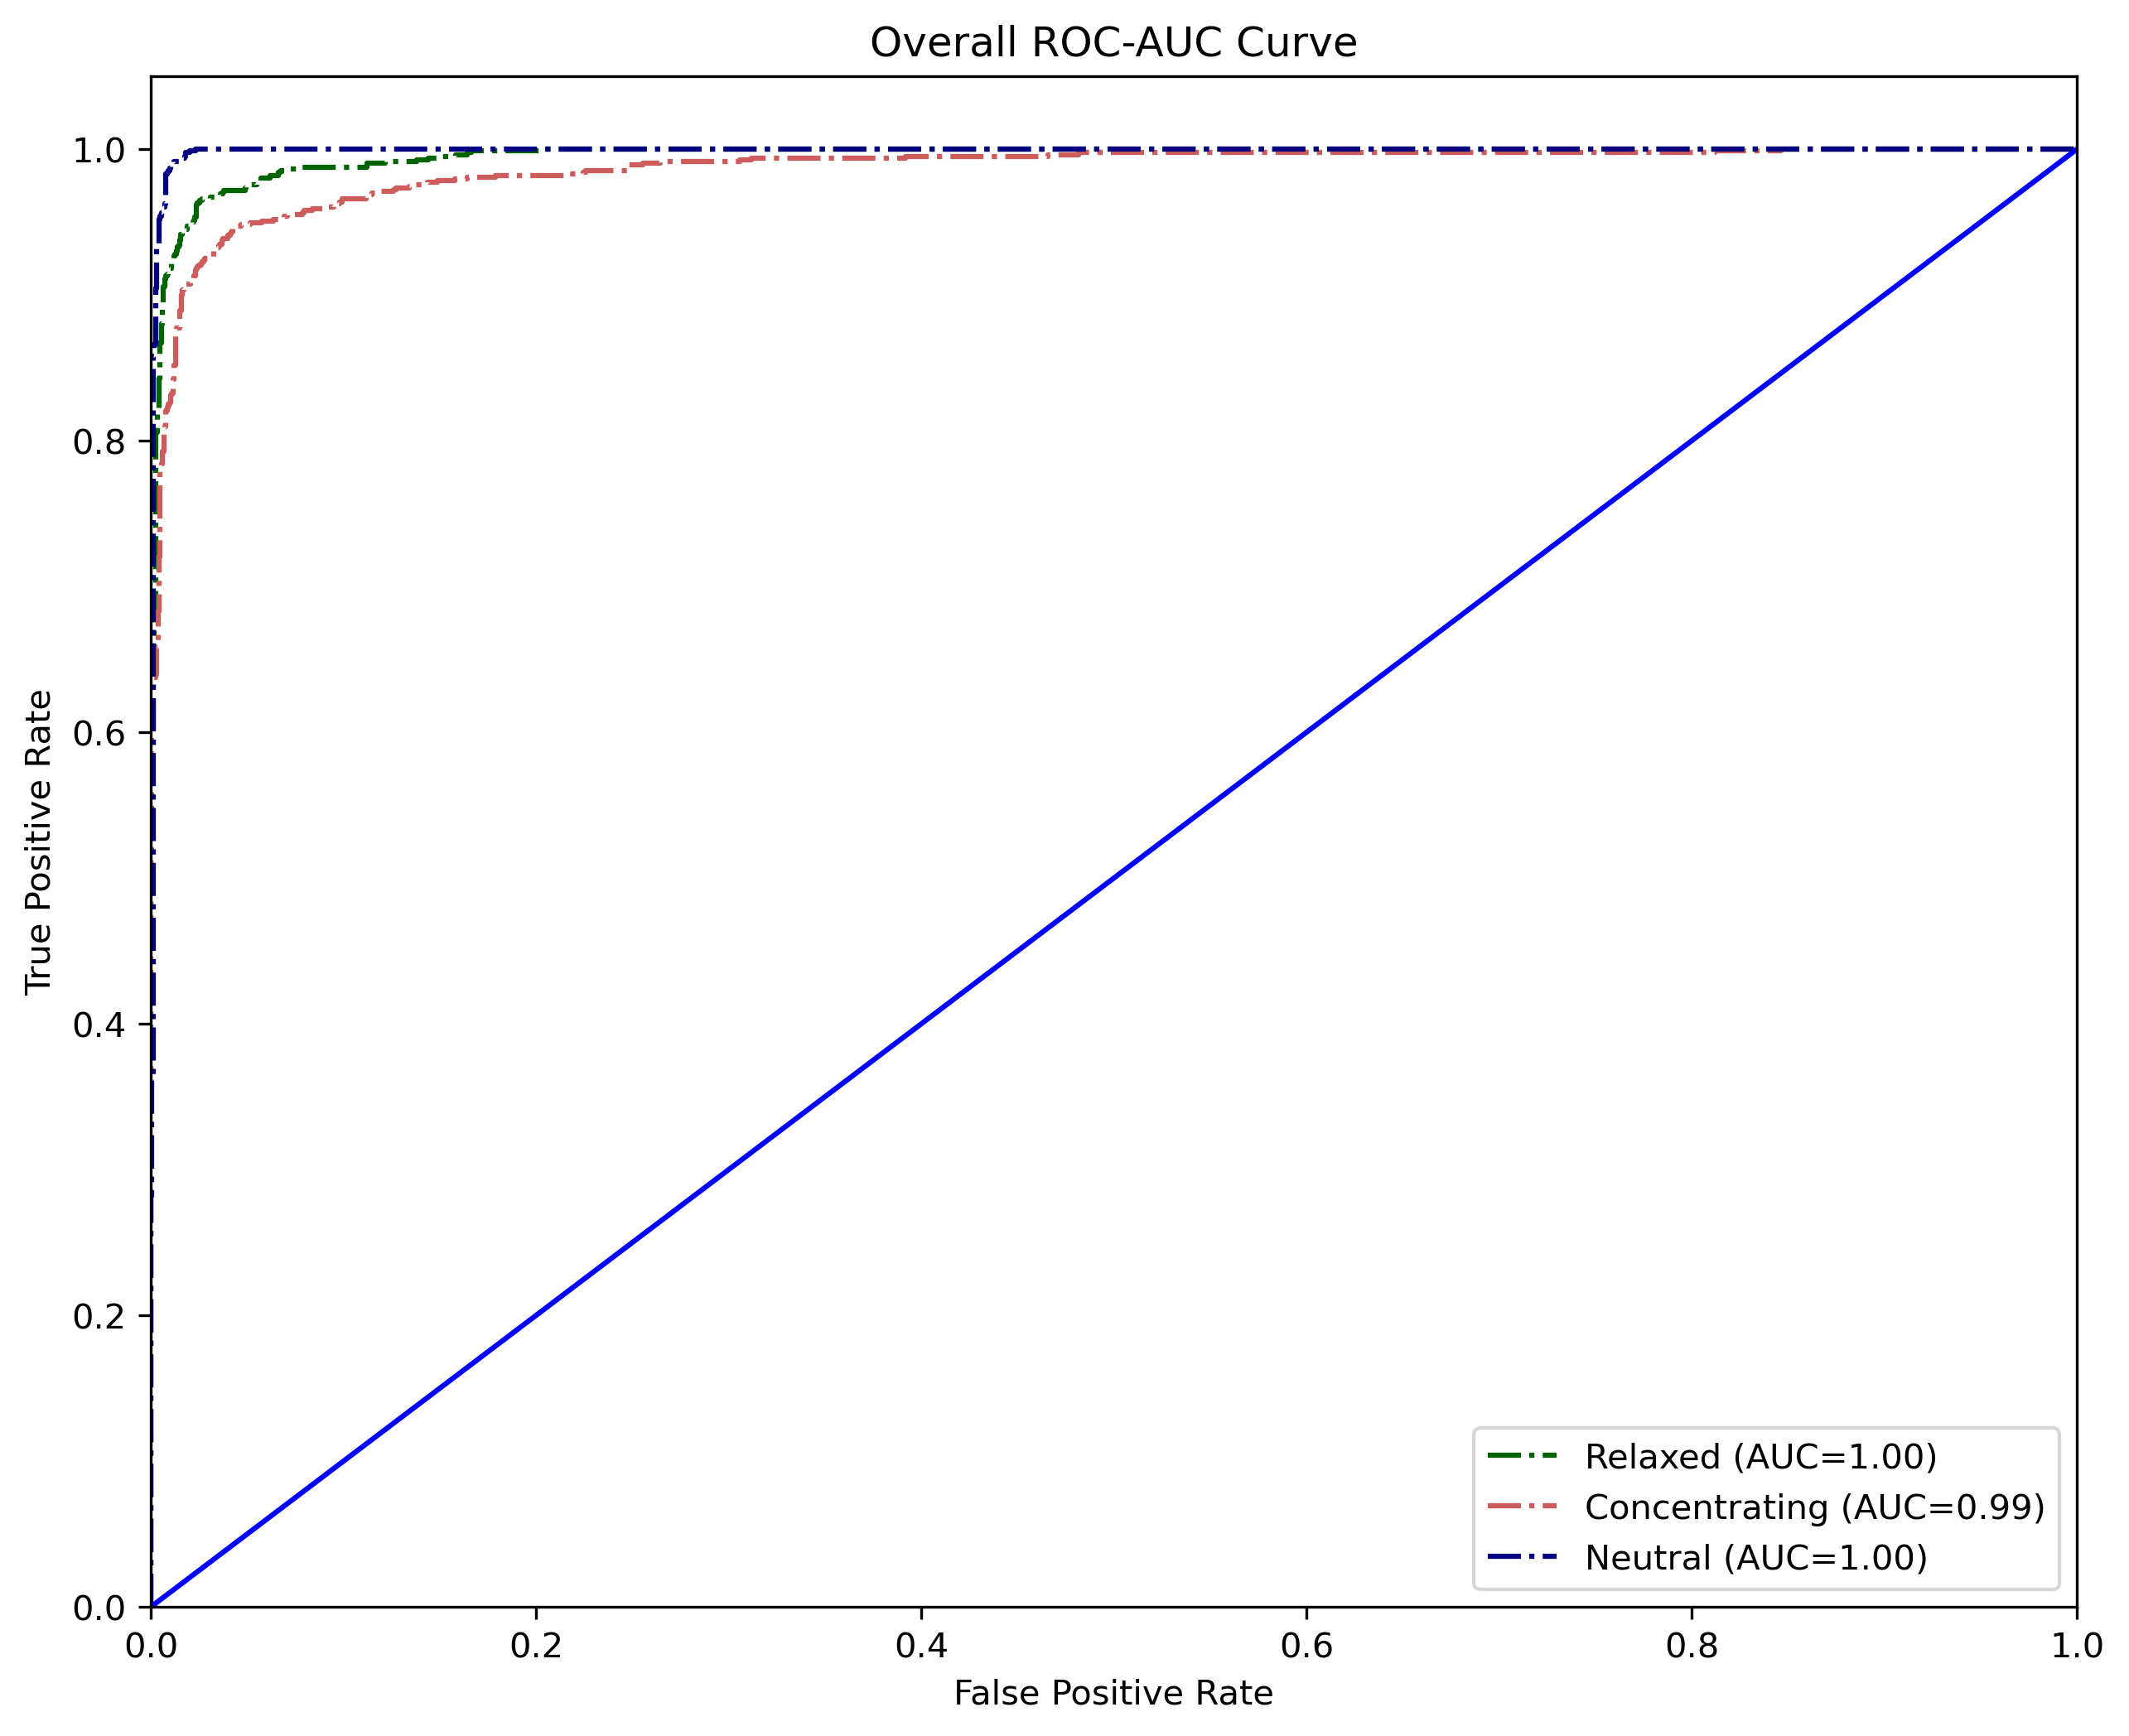

In [94]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y[:,i],y_new[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Relaxed (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Concentrating (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='Neutral (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)